Mean Squared Error: 5482.111543864967
Mean Absolute Error: 62.97395835603302


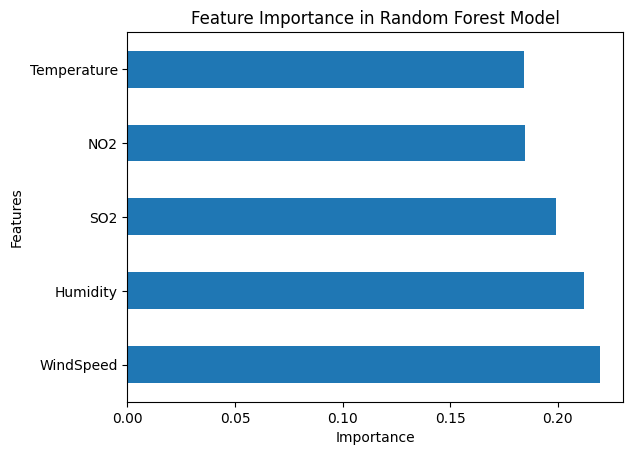

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random dataset
np.random.seed(42)
num_samples = 1000
num_features = 5

data = pd.DataFrame({
    'Temperature': np.random.uniform(15, 35, num_samples),
    'Humidity': np.random.uniform(30, 90, num_samples),
    'WindSpeed': np.random.uniform(0, 15, num_samples),
    'NO2': np.random.uniform(0, 150, num_samples),
    'SO2': np.random.uniform(0, 100, num_samples),
    'AQI': np.random.uniform(50, 300, num_samples)
})

# Preprocessing
data.dropna(inplace=True)  # handle missing values

# Split data into features and target
X = data.drop('AQI', axis=1)
y = data['AQI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()
